# Case previsão de tempo

## 1. Importar bibliotecas

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Dicionario de colunas abaixo:

Variable | Description
---------|------------
Date   |  The date of observation
Location   |  The common name of the location of the weather station
MinTemp   |  The minimum temperature in degrees celsius
MaxTemp   |  The maximum temperature in degrees celsius
Rainfall   |  The amount of rainfall recorded for the day in mm
Evaporation   |  The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine   |  The number of hours of bright sunshine in the day.
WindGustDir   |  The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed   |  The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am   |  Direction of the wind at 9am
WindDir3pm   |  Direction of the wind at 3pm
WindSpeed9am   |  Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm   |  Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am   |  Humidity (percent) at 9am
Humidity3pm   |  Humidity (percent) at 3pm
Pressure9am   |  Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm   |  Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am   |  Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am |  Temperature (degrees C) at 9am
Temp3pm |  Temperature (degrees C) at 3pm
Precipitation9am |  The amount of rain in mm prior to 9am
Precipitation3pm |  The amount of rain in mm prior to 3pm
AmountOfRain |  The amount of rain in mm
Temp |  Temperature (degrees C)
Humidity |  Humidity (percent)
RainToday |  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow |  The target variable. Did it rain tomorrow?

## 2. Importar arquivos

In [7]:
pwd

'C:\\Users\\victo\\Documents\\Ironhack\\Projetos\\Case-Itau'

In [8]:
rain_aus=pd.read_csv('./data/rain_data_aus.csv')
wind_01=pd.read_csv('./data/wind_table_01.csv')
wind_02=pd.read_csv('./data/wind_table_02.csv')
wind_03=pd.read_csv('./data/wind_table_03.csv')
wind_04=pd.read_csv('./data/wind_table_04.csv')
wind_05=pd.read_csv('./data/wind_table_05.csv')
wind_06=pd.read_csv('./data/wind_table_06.csv')
wind_07=pd.read_csv('./data/wind_table_07.csv')
wind_08=pd.read_csv('./data/wind_table_08.csv')
rain_aus.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580


#### Analizando a coluna amountOfRain, percebe-se que ela na versade se refere ao dia sucessor.

In [9]:
rain_aus[['rainfall']].head(10)

,rainfall
0,0.6
1,0.0
2,0.0
3,0.0
4,1.0
5,0.2
6,0.0
7,0.0
8,0.0
9,1.4


In [10]:
rain_aus[['rainfall','amountOfRain']].head(50)

,rainfall,amountOfRain
0,0.6,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,0.2
5,0.2,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,1.4
9,1.4,0.0


## 3. Exploring data

In [11]:
rain_aus.shape

(142193, 23)

In [12]:
wind_01.shape, wind_02.shape, wind_03.shape, wind_04.shape, wind_05.shape, wind_06.shape, wind_07.shape, wind_08.shape

((20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (20000, 8),
 (22193, 8),
 (22193, 8))

In [13]:
wind_01.head(3)

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0


In [14]:
wind_02.head(3)

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2010-01-25,SydneyAirport,E,31.0,ESE,E,7.0,22.0
1,2010-01-25,WaggaWagga,W,33.0,ENE,WSW,11.0,19.0
2,2010-01-25,Williamtown,E,39.0,SSW,ESE,11.0,22.0


In [15]:
wind_03.head(3)

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2011-05-14,NorfolkIsland,WNW,50.0,W,WNW,2.0,19.0
1,2011-05-14,Penrith,SW,41.0,SW,SW,13.0,19.0
2,2011-05-14,Richmond,SW,41.0,WSW,SW,19.0,22.0


### Transforming all the wind's df's into just 1

In [16]:
wind_01.isna().sum()

date                 0
location             0
wind_gustdir      2134
wind_gustspeed    2131
wind_dir9am       1436
wind_dir3pm        530
wind_speed9am      386
wind_speed3pm      391
dtype: int64

In [17]:
wind_01.columns=wind_03.columns

In [18]:
wind_02.columns=wind_03.columns

In [19]:
frames=[wind_01, wind_02, wind_03, wind_04, wind_05, wind_06, wind_07, wind_08]

In [20]:
wind = pd.concat(frames)
wind.head()

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [21]:
wind.shape

(164386, 8)

In [22]:
wind.columns

Index(['date', 'location', 'windgustdir', 'windgustspeed', 'winddir9am',
       'winddir3pm', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

In [23]:
rain_aus.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [24]:
wind['location'].unique()

array(['Canberra', 'Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth',
       'Hobart', 'Darwin', 'Albury', 'Newcastle', 'Penrith',
       'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Cairns',
       'GoldCoast', 'Townsville', 'MountGambier', 'Albany', 'Launceston',
       'AliceSprings', 'Wollongong', 'BadgerysCreek', 'Cobar',
       'CoffsHarbour', 'Moree', 'NorahHead', 'NorfolkIsland', 'Richmond',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Sale',
       'MelbourneAirport', 'Mildura', 'Portland', 'Watsonia', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'SalmonGums', 'Walpole', 'Dartmoor', 'Nhil', 'Katherine', 'Uluru'],
      dtype=object)

In [25]:
rain_aus['location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

### 3.1 Converting columns to numerical data

#### df rain_aus

In [26]:
rain_aus.shape

(142193, 23)

In [27]:
rain_aus['raintoday'].value_counts()

No     109332
Yes     31455
Name: raintoday, dtype: int64

In [28]:
#Dataset ('raintoday') ta desbalanceado por ter muito mais não do que sim, porisso, não podemos utilizar o Score de precisão.

#### Convertendo coluna de strings em numerica 0 e 1

In [29]:
rain_aus['raintoday'] = rain_aus['raintoday'].replace('No', 0).replace('Yes', 1)

In [30]:
rain_aus['raintomorrow'].value_counts()

No     110316
Yes     31877
Name: raintomorrow, dtype: int64

In [31]:
#Dataset ('raintomorrow') ta desbalanceado por ter muito mais não do que sim, porisso, não podemos utilizar o Score de precisão.

In [32]:
rain_aus['raintomorrow'] = rain_aus['raintomorrow'].replace('No', 0).replace('Yes', 1)

#### df wind

In [33]:
wind=wind.drop_duplicates()

In [34]:
wind.isna().sum()

date                 0
location             0
windgustdir       9330
windgustspeed     9270
winddir9am       10013
winddir3pm        3778
windspeed9am      1348
windspeed3pm      2630
dtype: int64

In [35]:
wind_na=wind.dropna()

In [39]:
rain_aus_na=rain_aus.dropna()

In [40]:
data = pd.merge(rain_aus_na, wind_na, on=['date','location'])
data.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,...,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,...,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,...,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0


In [41]:
data.shape

(56420, 29)

### 3.2 Using Heatmap to find correlations between data

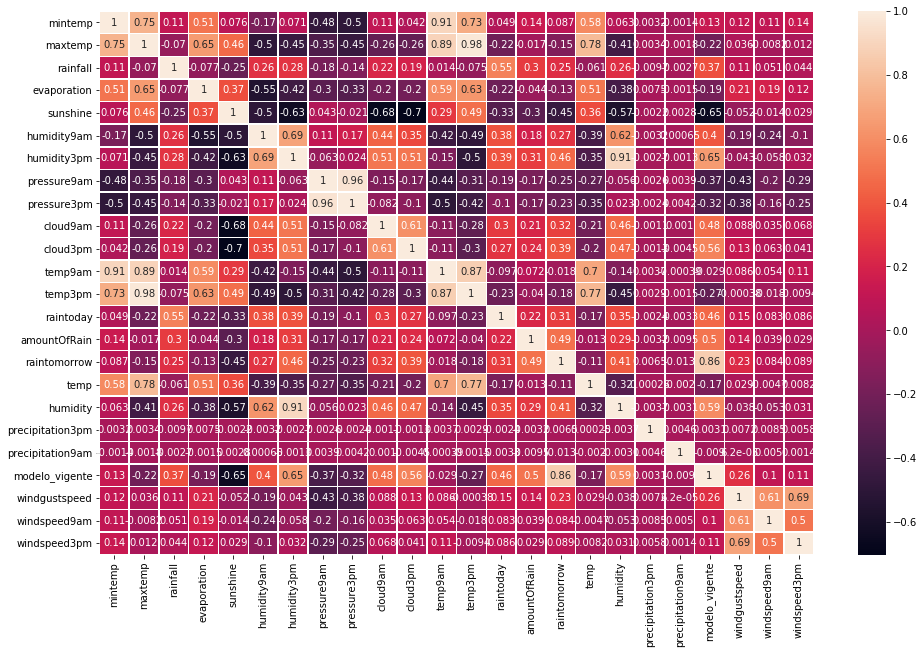

In [42]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,linewidths=.5)

### 3.3 Drop Nan no df

In [43]:
rain_aus.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

In [44]:
data['precipitation3pm'].value_counts()

10    7042
9     6965
11    6432
8     6360
12    5395
7     5137
13    4088
6     3523
14    2884
5     2082
15    2008
16    1297
4     1072
17     722
18     432
3      427
19     194
2      136
20     111
21      46
22      24
1       21
23      10
0        8
24       2
25       1
26       1
Name: precipitation3pm, dtype: int64

In [45]:
#Conferir se os dados estão corretos

In [46]:
data['precipitation9am'].unique()

array([15.16578397,  9.75083372,  5.55798566, ..., 18.46266227,
       16.34368987,  9.18705364])

In [47]:
rain_aus_na=rain_aus.dropna()

In [48]:
rain_aus_na.shape

(61918, 23)

In [49]:
rain_aus_na['raintomorrow'].value_counts()

0    48106
1    13812
Name: raintomorrow, dtype: int64

### 3.4 Setting numerical columns to work with 

In [50]:
 rain_aus_na['cloud3pm']

5939      5.0
5940      1.0
5942      6.0
5943      5.0
5944      6.0
         ... 
139108    1.0
139109    0.0
139110    0.0
139111    1.0
139112    5.0
Name: cloud3pm, Length: 61918, dtype: float64

In [51]:
numeric = ['mintemp','maxtemp','rainfall','evaporation','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am','raintoday','raintomorrow', 'cloud9am','cloud3pm']

In [52]:
A=rain_aus_na[numeric]

In [53]:
X=A.drop(columns=['raintomorrow'])

In [54]:
numeric2=['mintemp','maxtemp','rainfall','evaporation','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am','raintoday', 'cloud9am','cloud3pm']

In [55]:
y=pd.DataFrame(A['raintomorrow'])

## 4. Regressão Logistica

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
modelo=LogisticRegression()

In [58]:
X=rain_aus_na[numeric].drop(columns=['raintomorrow'])

In [59]:
y=rain_aus_na['raintomorrow']

In [60]:
modelo.fit(X,y)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
modelo.score(X,y)

0.8326173326011822

### 4.1 Plotando o resultado em Confusion matrix
A ideia é verificar se tras um modelo com bom resultado de previsão de chuva, e ter um parametro pra outros resultados que vou tentar mais pra frente.

In [76]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

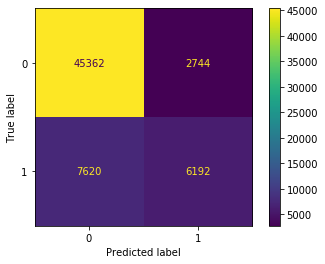

In [77]:
plot_confusion_matrix(modelo, X,y, values_format='.0f')

#### Acuracia 
É tudo o que acertamos sobre o valor geral - Tomar cuidado pra não utilizar em datasets desbalanceados

In [78]:
modelo.score(X,y)

0.8326173326011822

#### Obs. Precisão e Recall - usar para capturar um grupo especifica (Ex. Se chover eu nao posso errar)... são mais indicados pra utilizar com datasets desbalanceados

#### Precisão 
Dos dias previstos de chuva, quantos realmente choveram

In [79]:
y_pred=modelo.predict(X)

In [173]:
y_pred.mean()

0.10297766749379653

In [80]:
precision_score(y,y_pred)

0.6929274843330349

#### Recall 
 Dos dias de chuva, quantidade de acertos. Não leva em consideração os dias que previu que não choveria

In [81]:
recall_score(y,y_pred)

0.4483058210251955

#### F1 Score 

In [82]:
f1_score(y,y_pred)

0.544399507649024

A acuracia nos mostra que acertamos 83% das previsões.

### 4.2 Agora, vamos aplicar o modelo com treino e teste
O intuito eh checar se traz um resultado mais preciso.

In [83]:
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve

In [84]:
from sklearn.datasets import make_classification

In [85]:
rain_aus.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')

In [86]:
rain_aus['modelo_vigente'].unique()

array([0.0898246 , 0.0234771 , 0.02758046, ..., 0.00205312, 0.02335036,
       0.00719523])

### 4.3 Determinar o X,y_train e o X,y_test

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape

(49534, 18)

In [89]:
X_test.shape

(12384, 18)

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


X_test = scaler.transform(X_test)

### 4.4 Aplicar LogisticRegression com modelo mais complexo

In [91]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4.5 Plotando a curva ROC
#### A curva ROC vai me mostrar o quanto varia a taxa de True positive pra falso positive, e também o quanto o modelo é fiel ao resultado, quanto mais alinhado o modelo preditovo estiver com o teste, mais proximo (rente) a curva vai ficar.
Nesse caso abaixo, eles estão super alinhados,o que significa que o modelo aplicado no treino, foi aplicado no teste, e ambos ficaram iguais, por isso, posso confiar nesse modelo.
https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d

In [92]:
from sklearn.metrics import plot_roc_curve

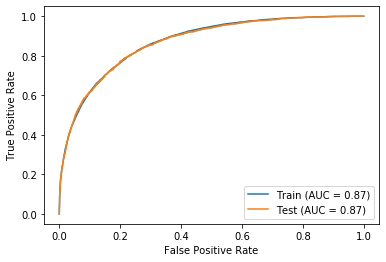

In [93]:
fig, ax = plt.subplots()

plot_roc_curve(logistic, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Test')

#### Analizando a relação entre as variaveis

In [94]:
X.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,raintoday,cloud9am,cloud3pm
mintemp,1.000000,0.743674,0.110846,0.510004,0.070680,-0.177758,0.076333,-0.475451,-0.491435,0.905552,0.720796,0.578773,0.068579,0.003508,-0.001382,0.051478,0.115204,0.050917
maxtemp,0.743674,1.000000,-0.069482,0.652247,0.461698,-0.496329,-0.448043,-0.355855,-0.454047,0.890743,0.984101,0.779778,-0.406402,0.003385,-0.001055,-0.220012,-0.262003,-0.253183
rainfall,0.110846,-0.069482,1.000000,-0.074049,-0.243738,0.258127,0.270421,-0.177673,-0.133452,0.014438,-0.073640,-0.060093,0.247128,-0.007556,-0.003066,0.553481,0.215699,0.191743
evaporation,0.510004,0.652247,-0.074049,1.000000,0.366577,-0.554104,-0.414895,-0.304406,-0.330799,0.598609,0.631686,0.509947,-0.375537,0.007043,-0.000189,-0.213291,-0.192775,-0.196180
sunshine,0.070680,0.461698,-0.243738,0.366577,1.000000,-0.498855,-0.622767,0.035783,-0.027949,0.285678,0.483256,0.359295,-0.565134,-0.003376,0.004404,-0.327720,-0.678801,-0.704871
humidity9am,-0.177758,-0.496329,0.258127,-0.554104,-0.498855,1.000000,0.679847,0.122421,0.178441,-0.426737,-0.487789,-0.388460,0.617538,-0.003913,-0.001670,0.371288,0.432826,0.344565
humidity3pm,0.076333,-0.448043,0.270421,-0.414895,-0.622767,0.679847,1.000000,-0.057837,0.028653,-0.148491,-0.498921,-0.351533,0.907959,-0.003120,-0.003777,0.376480,0.507677,0.507461
pressure9am,-0.475451,-0.355855,-0.177673,-0.304406,0.035783,0.122421,-0.057837,1.000000,0.961926,-0.447688,-0.314549,-0.274905,-0.052670,-0.002484,0.003967,-0.183468,-0.142788,-0.164998
pressure3pm,-0.491435,-0.454047,-0.133452,-0.330799,-0.027949,0.178441,0.028653,0.961926,1.000000,-0.500713,-0.422233,-0.351972,0.025834,-0.002560,0.004046,-0.100839,-0.074193,-0.101631
temp9am,0.905552,0.890743,0.014438,0.598609,0.285678,-0.426737,-0.148491,-0.447688,-0.500713,1.000000,0.867197,0.694676,-0.134657,0.003672,-0.000129,-0.094113,-0.101916,-0.100641


#### Checando colunas que mais impactam no resultado (chuva)

In [95]:
pd.DataFrame(zip(logistic.coef_[0], X.columns), columns=['coef','variables']).sort_values(by='coef')

,coef,variables
8,-1.389287,pressure3pm
10,-0.560154,temp3pm
4,-0.557875,sunshine
0,-0.185888,mintemp
5,-0.113346,humidity9am
16,-0.076170,cloud9am
14,-0.043396,precipitation9am
12,-0.028384,humidity
11,-0.011616,temp
13,0.027475,precipitation3pm


## 4.5 Plotando o modelo mais complexo em Confusion matrix

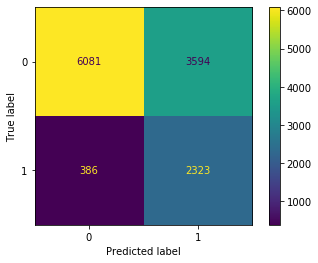

In [96]:
plot_confusion_matrix(modelo, X_test,y_test, values_format='.0f')

#### Acuracia 
(Mais complexo)

In [97]:
modelo.score(X_test,y_test)

0.6786175710594315

#### Precisão
(Mais complexo)

In [98]:
y_pred_test=modelo.predict(X_test)

In [99]:
precision_score(y_test,y_pred_test)

0.3925976001352037

#### Recall
(Mais complexo)

In [100]:
recall_score(y_test,y_pred_test)

0.8575119970468807

#### F1 Score
(Mais complexo)

In [101]:
f1_score(y_test,y_pred_test)

0.5386042198006028

## 5. Applying KNN fo fill NaNs - incomplete

In [102]:
from sklearn.datasets import make_classification

### Splitting into train and test dataframes

## Refazer

In [103]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)

NameError: name 'X_train_std' is not defined

In [104]:
logistic.intercept_

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [105]:
logistic.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

## KNN

NameError: name 'X_fake_train' is not defined

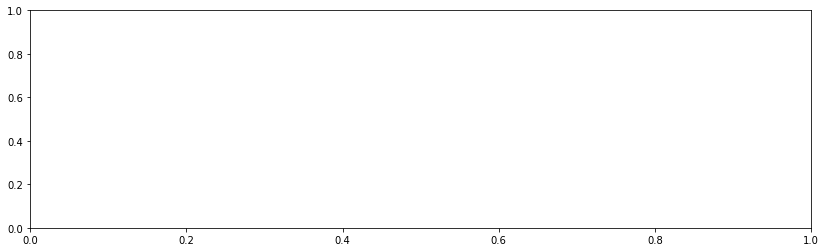

In [106]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax.scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')

NameError: name 'X_fake_train' is not defined

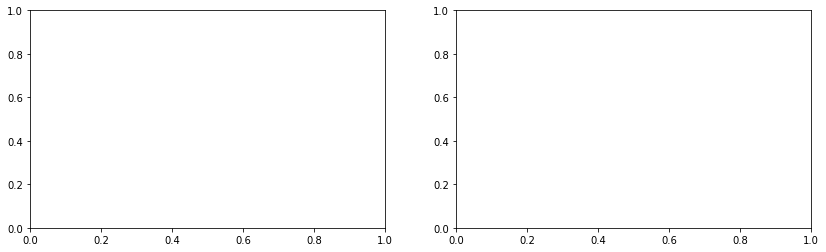

In [107]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax[0].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[0].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.4, alpha=.2)
ax[0].add_artist(p1)
ax[0].set_title('K = 3')

ax[1].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[1].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.82, alpha=.2)
ax[1].add_artist(p1)
ax[1].set_title('K = 5')

### Obs. Planejei substiruir todos os NaNs pelos medias do KNNs,mas não consegui seguir com essa etapa.

## 6. Using PCA to split in groups

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [109]:
pca = PCA(2)

data_std = StandardScaler().fit_transform(data[numeric])
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
pc1 = pca.transform(data_std)[:, 0]
pc2 = pca.transform(data_std)[:, 1]

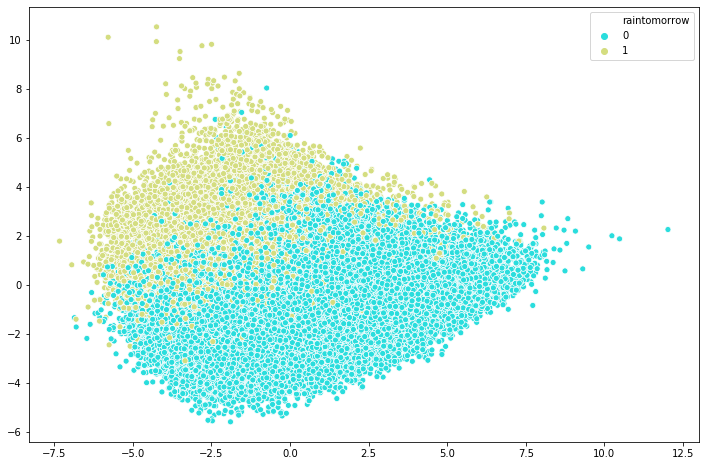

In [111]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(pc1, pc2, hue=data['raintomorrow'],palette='rainbow')
plt.show()

## 7. Applying Linnear regression for each group

In [112]:
#pd.set_option("display.max_columns", len(df.columns))
#Para visualizar todas as colunas do DF

In [113]:
pd.set_option("display.max_columns", len(data.columns)) 

In [114]:
data.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,44.24,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,36.68,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,47.12,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0


### Linnear Regression - raintomorrow = 0

In [115]:
data_0=data[data['raintomorrow']==0]
data_0.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,44.24,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,36.68,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,47.12,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0


In [116]:
data_0.shape

(43993, 29)

In [117]:
X0=data_0[numeric].drop(columns=['raintomorrow'])
y0=data_0['raintomorrow']

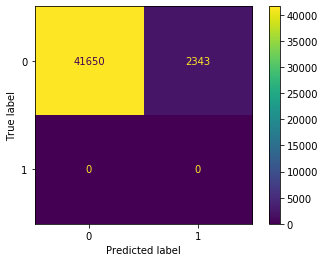

In [118]:
plot_confusion_matrix(modelo, X0,y0, values_format='.0f')

#### Acuracia

In [119]:
modelo.score(X0,y0)

0.9467415270611234

#### Precisão

In [120]:
y0_pred=modelo.predict(X0)
precision_score(y0,y0_pred)

0.0

#### Recal

In [121]:
recall_score(y0,y0_pred)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

#### F1 Score

In [122]:
f1_score(y0,y0_pred)

0.0

### Linnear Regression - raintomorrow = 1

In [123]:
data_1=data[data['raintomorrow']==1]
data_1.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
17,2009-01-19,Cobar,21.4,37.5,0.0,14.8,6.9,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0.0,4.8,1,47.000000,36.8,12,4.800715,0.508444,NNE,43.0,ENE,NNE,26.0,9.0
20,2009-01-22,Cobar,21.8,30.7,0.0,8.0,5.9,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,0.0,18.0,1,38.840000,77.6,14,17.000266,0.668741,WNW,56.0,N,N,24.0,19.0
21,2009-01-23,Cobar,20.3,36.0,18.0,8.2,10.5,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,1.0,8.6,1,2.885476,62.0,13,22.201948,0.565887,WSW,94.0,NNE,NW,13.0,7.0


In [124]:
data_1.shape

(12427, 29)

In [125]:
X1=data_1[numeric].drop(columns=['raintomorrow'])
y1=data_1['raintomorrow']

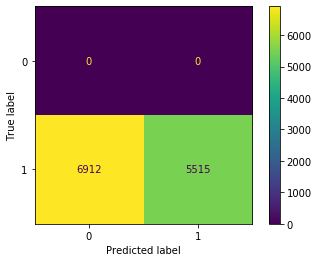

In [126]:
plot_confusion_matrix(modelo, X1,y1, values_format='.0f')

#### Acuracia

In [127]:
modelo.score(X1,y1)

0.4437917437836968

#### Precisão

In [128]:
y1_pred=modelo.predict(X1)
precision_score(y1,y1_pred)

1.0

#### Recall

In [129]:
recall_score(y1,y1_pred)

0.4437917437836968

#### F1 Score

In [130]:
f1_score(y1,y1_pred)

0.6147586668152937

## 8. Geolocalização tratar a coluna location, transformar em numerica pra checar se temos um resultado mais proximo

In [131]:
#! pip install geopy --user

In [132]:
from geopy.geocoders import Nominatim

In [133]:
a=data['location']

### 8.1 Corrigindo dados errados na coluna 'Location'

In [134]:
a[a=='SydneyAirport']='Sidney Airport'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
a[a=='MelbourneAirport']='Melbourne Airport'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
a[a=='MountGambier']='Mount Gambier'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
a[a=='WaggaWagga']='Wagga Wagga'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
a[a=='PerthAirport']='Perth Airport'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
a[a=='AliceSprings']='Alice Springs'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
a[a=='NorfolkIsland']='Norfolk Island'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
a[a=='CoffsHarbour']='Coffs Harbour'

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
a.unique()

array(['Cobar', 'Coffs Harbour', 'Moree', 'Norfolk Island', 'Sydney',
       'Sidney Airport', 'Wagga Wagga', 'Williamtown', 'Canberra', 'Sale',
       'Melbourne Airport', 'Melbourne', 'Mildura', 'Portland',
       'Watsonia', 'Brisbane', 'Cairns', 'Townsville', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Perth Airport', 'Perth', 'Hobart',
       'Alice Springs', 'Darwin'], dtype=object)

In [143]:
b=pd.DataFrame(data['location'].unique(),columns=['location'])

### 8.2 Transformando as cidades em coordenadas

In [144]:
latitude=[]
longitude=[]
for item in b['location']:
    latitude.append(Nominatim().geocode(item).latitude)
    longitude.append(Nominatim().geocode(item).longitude)

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.
C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the d

In [145]:
b['latitude']=latitude
b['longitude']=longitude

In [146]:
b

,location,latitude,longitude
0,Cobar,-31.498333,145.834444
1,Coffs Harbour,-30.296241,153.113529
2,Moree,47.901594,1.237803
3,Norfolk Island,-29.032804,167.948314
4,Sydney,-33.854816,151.216454
5,Sidney Airport,42.304457,-75.415004
6,Wagga Wagga,-35.115000,147.367778
7,Williamtown,-32.815000,151.842778
8,Canberra,-35.297591,149.101268
9,Sale,44.980656,8.809348


In [147]:
data = pd.merge(b, data, on=['location'])

In [148]:
data

,location,latitude,longitude,date,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,Cobar,-31.498333,145.834444,2009-01-01,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,...,0.0,0.0,0,44.24,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,Cobar,-31.498333,145.834444,2009-01-02,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,...,0.0,0.0,0,36.68,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,Cobar,-31.498333,145.834444,2009-01-04,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,...,0.0,0.0,0,47.12,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0
3,Cobar,-31.498333,145.834444,2009-01-05,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,1.0,...,0.0,0.0,0,48.08,28.4,10,17.820001,0.010724,WNW,31.0,WNW,WSW,6.0,6.0
4,Cobar,-31.498333,145.834444,2009-01-06,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,1.0,...,0.0,0.0,0,51.20,20.0,9,13.217116,0.103292,WNW,35.0,NW,WNW,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,-12.460440,130.841047,2017-06-20,19.3,33.4,0.0,6.0,11.0,63.0,32.0,1013.9,1010.5,0.0,...,0.0,0.0,0,42.08,40.4,7,15.000004,0.008671,ENE,35.0,SE,NE,9.0,20.0
56416,Darwin,-12.460440,130.841047,2017-06-21,21.2,32.6,0.0,7.6,8.6,56.0,28.0,1014.6,1011.2,7.0,...,0.0,0.0,0,41.12,35.6,12,3.721395,0.052358,E,37.0,SE,SE,13.0,11.0
56417,Darwin,-12.460440,130.841047,2017-06-22,20.7,32.8,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,0.0,...,0.0,0.0,0,41.36,29.6,10,18.462662,0.005346,E,33.0,E,W,17.0,11.0
56418,Darwin,-12.460440,130.841047,2017-06-23,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,1.0,...,0.0,0.0,0,40.16,71.6,6,16.343690,0.025044,ESE,26.0,SE,NNW,9.0,17.0


In [149]:
numeric3 = ['mintemp','maxtemp','rainfall','evaporation','sunshine','humidity9am','humidity3pm','pressure9am','pressure3pm','temp9am','temp3pm','temp','humidity','precipitation3pm','precipitation9am','raintoday','raintomorrow', 'cloud9am','cloud3pm','latitude','longitude']

In [150]:
data[numeric3].head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,temp,humidity,precipitation3pm,precipitation9am,raintoday,raintomorrow,cloud9am,cloud3pm,latitude,longitude
0,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,26.6,33.4,44.24,17.6,5,15.165784,0.0,0,2.0,5.0,-31.498333,145.834444
1,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,20.3,27.0,36.68,11.6,9,9.750834,0.0,0,1.0,1.0,-31.498333,145.834444
2,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,28.7,34.9,47.12,28.4,11,5.557986,0.0,0,1.0,6.0,-31.498333,145.834444
3,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,29.1,35.6,48.08,28.4,10,17.820001,0.0,0,1.0,5.0,-31.498333,145.834444
4,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,33.6,37.6,51.20,20.0,9,13.217116,0.0,0,1.0,6.0,-31.498333,145.834444


### 8.3 Tirando Linear regression do df 'data' com latitude e longitude representando location

In [151]:
X_lat=data[numeric].drop(columns=['raintomorrow'])
y_lat=data['raintomorrow']

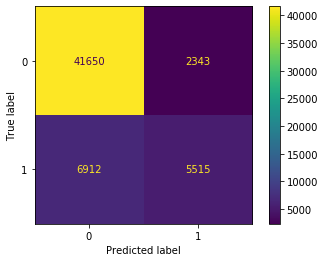

In [152]:
plot_confusion_matrix(modelo, X_lat,y_lat, values_format='.0f')

#### Acuracia
##### Total de acertos

In [153]:
modelo.score(X_lat,y_lat)

0.8359624246721021

#### Precisão

In [154]:
y_lat_pred=modelo.predict(X_lat)
precision_score(y_lat,y_lat_pred)

0.7018325273606516

##### Acerta 70% dias que o modelo previu que choveria.

#### Recall - pega o numero de dias q chove.
##### quantos dias meu modelo falou que ia chover, e realmente choveu dividido pelo numero de dias total que choveu

In [155]:
recall_score(y1,y1_pred)

0.4437917437836968

#### F1 Score

In [156]:
f1_score(y1,y1_pred)

0.6147586668152937

In [171]:
data['raintomorrow'].mean()

0.22025877348457992

In [ ]:
O dataset mostra que 78% dos dias não chove (dado desbalanceado), por isso não é muito interessante utilizar a acurácia. 
podemos concluir que 70% de precisão
Só estou acertando 44% dos dias que chove

## 9. Arvore de decisão

In [157]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [158]:
tree=DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [160]:
X=data.drop(columns=['raintomorrow','location','date','winddir9am', 'winddir3pm','windgustdir','amountOfRain','modelo_vigente'])
y=data['raintomorrow']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
X.columns

Index(['latitude', 'longitude', 'mintemp', 'maxtemp', 'rainfall',
       'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm',
       'raintoday', 'temp', 'humidity', 'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm'],
      dtype='object')

In [163]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
y_pred=tree.predict(X_test)

In [167]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
11279,0
11280,0
11281,0
11282,0


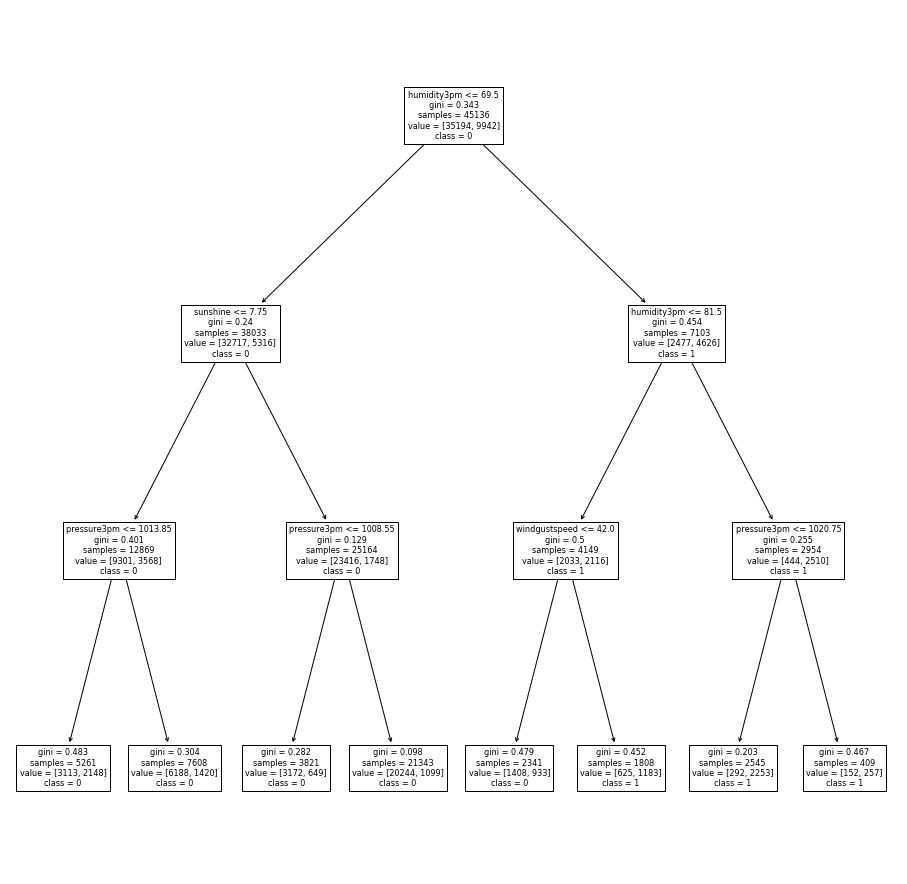

In [165]:
plt.figure(figsize=(16,16))

plot_tree(tree, feature_names=X.columns, class_names=['0','1']);

In [2]:
# Tentei utilizar a arvore de decisão 

In [5]:
from random import choices
frases = ['Quais foram suas hipóteses iniciais?',
          'Pq você optou por este método?',
          'Onde você queria chegar com isso?',
          'Como você pode avaliar os seus resultados?',
          'O que estas métricas te dizem?',
          'Diante disso, quais podem ser seus próximos passos?']
return choices(frases)[0]


SyntaxError: 'return' outside function (<ipython-input-5-893c2816a786>, line 8)